In [183]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Titanic"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=600):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [184]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
titanic = pd.read_csv("titanic_train.csv") 

In [185]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [186]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [187]:
titanic["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [188]:
titanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [189]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [190]:
titanic.median()

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

Saving figure attribute_histogram_plots


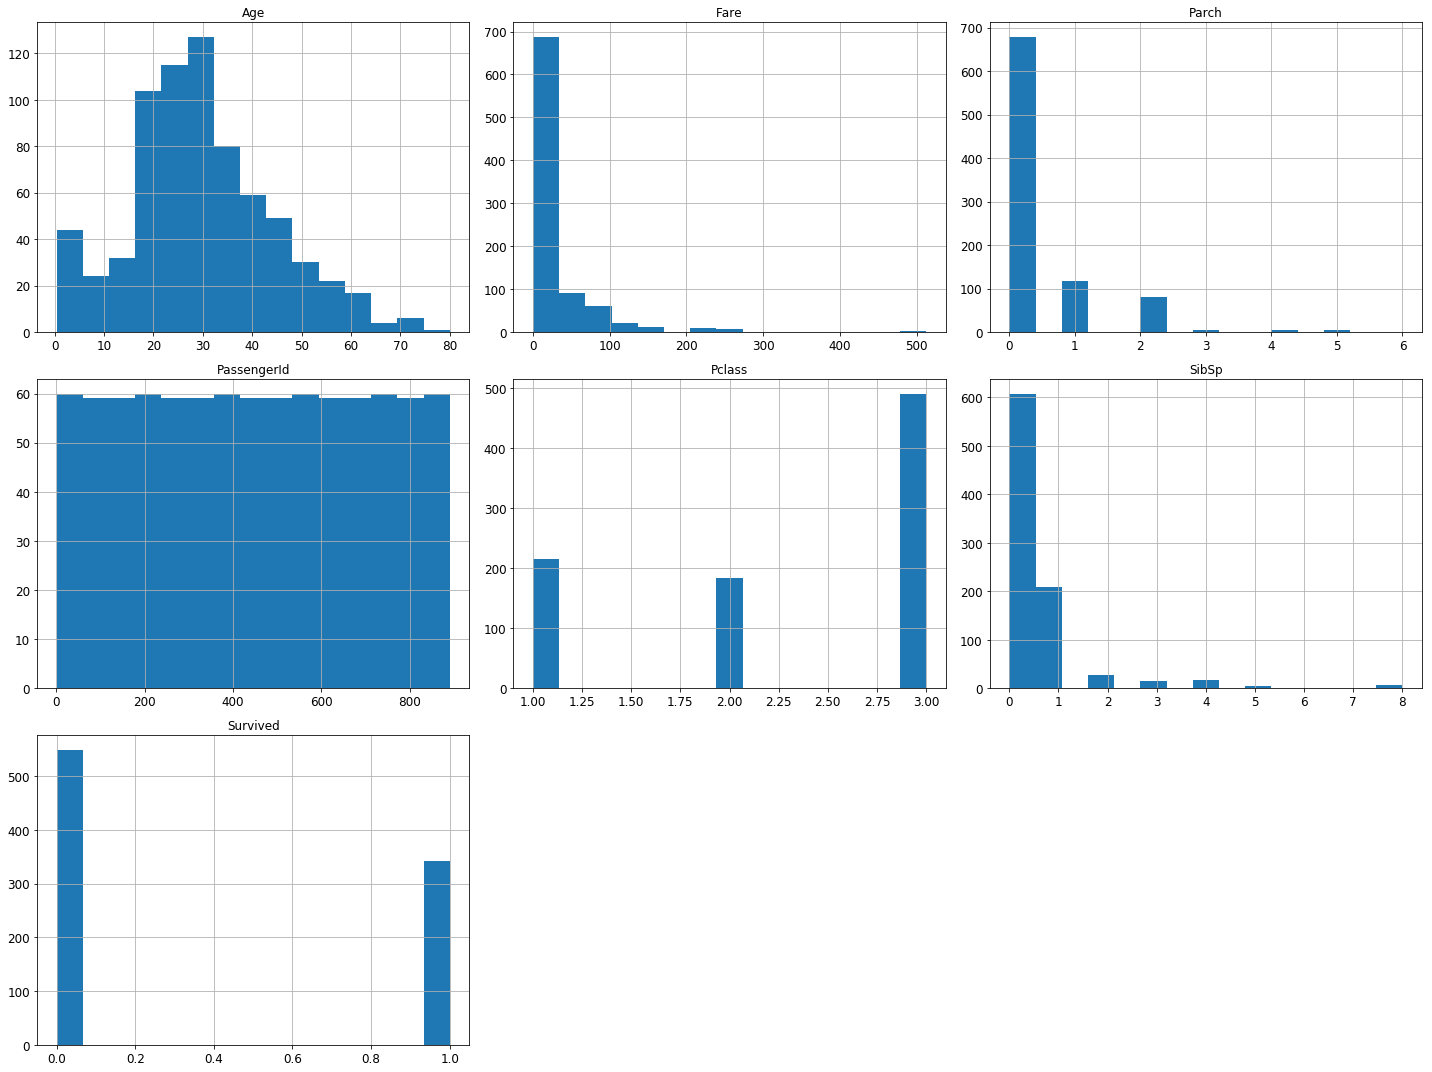

In [191]:
%matplotlib inline
import matplotlib.pyplot as plt
titanic.hist(bins=15, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [192]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [193]:
from sklearn.model_selection import train_test_split

titanic_train, titanic_test = train_test_split(titanic, test_size=0.2, random_state=42)

In [194]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S


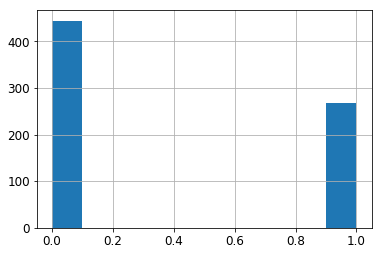

In [195]:
titanic_train["Survived"].hist()

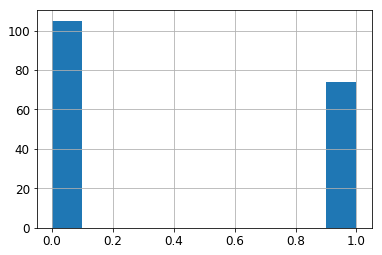

In [196]:
titanic_test["Survived"].hist()

In [197]:
(titanic["Fare"]>100).value_counts()

False    838
True      53
Name: Fare, dtype: int64

Saving figure Age_Fare


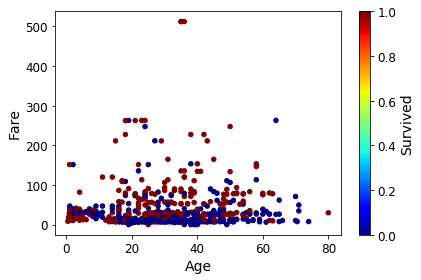

In [198]:
titanic.plot(kind="scatter", x="Age", y="Fare", alpha=1, c="Survived", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
save_fig("Age_Fare")

In [199]:
corr_matrix = titanic.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Saving figure scatter_matrix_plot


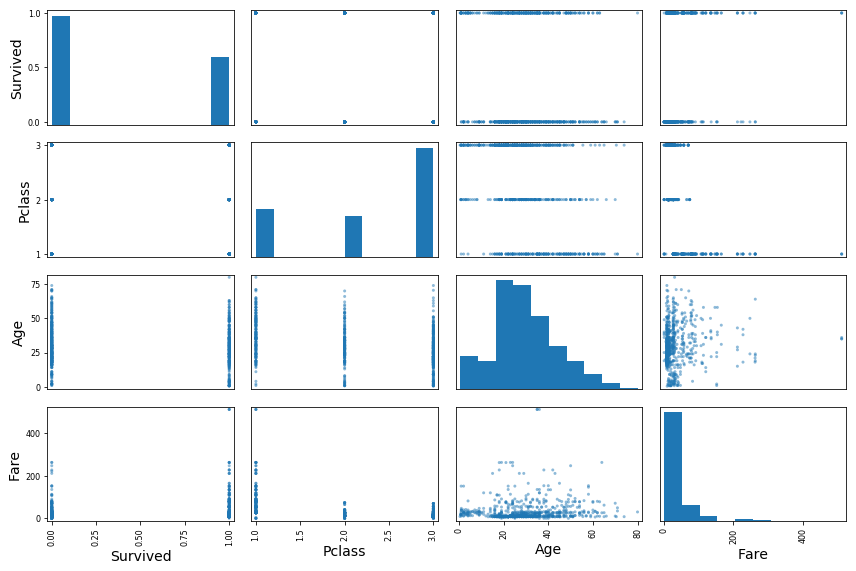

In [200]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["Survived", "Pclass", "Age", "Fare", "Sex"]
scatter_matrix(titanic[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure seaborn_Age_Fare_Survived_Pclass


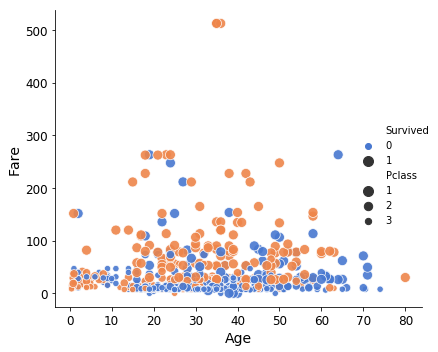

In [201]:
import seaborn as sns

sns.relplot(x="Age", y="Fare", hue = "Survived", palette="muted", size="Pclass", sizes=(100, 40),  legend="full", alpha=0.9,  data=titanic)
save_fig("seaborn_Age_Fare_Survived_Pclass")

In [202]:
titanic["Sexo"] = 0

In [203]:
titanic.Sexo[titanic["Sex"] == "male"] = 1

c:\python352\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [204]:
corr_matrix = titanic.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sexo
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333
Sexo,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000


In [205]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sexo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


Saving figure seaborn_Age_Fare_Survived_Pclass


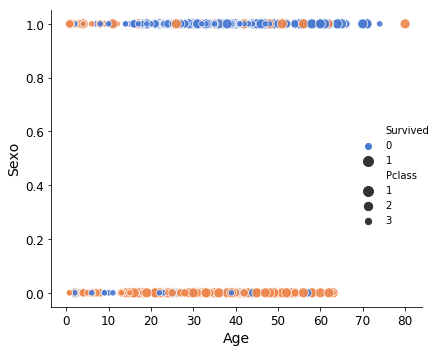

In [206]:
sns.relplot(x="Age", y="Sexo", hue = "Survived", palette="muted", size="Pclass", sizes=(100, 40),
            legend="full", alpha=0.9, data=titanic)
save_fig("seaborn_Age_Fare_Survived_Pclass")

Saving figure seaborn_Age_Survived


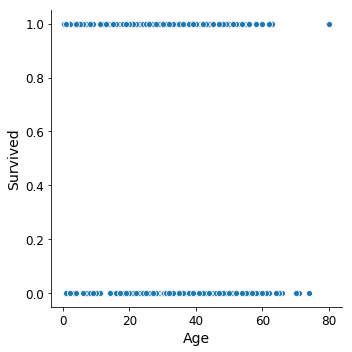

In [207]:
sns.relplot(x="Age", y="Survived", legend="full",  data=titanic)
save_fig("seaborn_Age_Survived")

In [208]:
titanic_children = titanic[titanic["Age"] <= 10]
titanic_children

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sexo
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,0
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,1
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S,0
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C,0
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S,1
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S,0
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S,1
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,1
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S,0


In [209]:
corr_matrix = titanic_children.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sexo
PassengerId,1.000000,0.119495,0.013829,0.047853,-0.140741,-0.157295,-0.142827,0.031768
Survived,0.119495,1.000000,-0.410472,-0.323497,-0.700182,-0.183849,-0.135933,-0.037798
Pclass,0.013829,-0.410472,1.000000,0.232425,0.420545,-0.120204,-0.622923,-0.062654
Age,0.047853,-0.323497,0.232425,1.000000,0.142037,0.186694,-0.100617,-0.107825
SibSp,-0.140741,-0.700182,0.420545,0.142037,1.000000,0.134973,0.091881,0.218941
Parch,-0.157295,-0.183849,-0.120204,0.186694,0.134973,1.000000,0.363853,-0.054948
Fare,-0.142827,-0.135933,-0.622923,-0.100617,0.091881,0.363853,1.000000,0.101799
Sexo,0.031768,-0.037798,-0.062654,-0.107825,0.218941,-0.054948,0.101799,1.000000


In [210]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(titanic, titanic["Sexo"]):
    strat_train_set = titanic.loc[train_index]
    strat_test_set = titanic.loc[test_index]

In [211]:
strat_test_set["Sexo"].value_counts() / len(strat_test_set)

1    0.648045
0    0.351955
Name: Sexo, dtype: float64

# Prepare the data for Machine Learning algorithms

In [212]:
pd.isna(titanic['Embarked']).head(10)
# checking the missing data in 'Embarked'

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Embarked, dtype: bool

In [213]:
titanic.Embarked[pd.isna(titanic['Embarked'])] = 'S'
# assigning the missing data in 'Embarked' column with 'S'

c:\python352\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [214]:
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [215]:
646 + 168 + 77
# now 'Embarked' has no missing values

891

In [216]:
titanic_droped = titanic.drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'Sex'], axis = 1)

In [217]:
titanic_droped.Embarked[titanic_droped['Embarked'] == 'S'] = 1
titanic_droped.Embarked[titanic_droped['Embarked'] == 'C'] = 2
titanic_droped.Embarked[titanic_droped['Embarked'] == 'Q'] = 3


c:\python352\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\python352\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python352\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [218]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
# filling the missing data with the median values 

In [219]:
imputer.fit(titanic_droped)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [220]:
imputer.statistics_

array([ 0.    ,  3.    , 28.    ,  0.    ,  0.    , 14.4542,  1.    ,
        1.    ])

In [221]:
X = imputer.transform(titanic_droped)

In [222]:
titanic_tr = pd.DataFrame(X, columns=titanic_droped.columns,
                          index = list(titanic.index.values))

In [223]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(titanic_tr, titanic_tr["Survived"]):
    strat_train_set = titanic_tr.loc[train_index]
    strat_test_set = titanic_tr.loc[test_index]

In [224]:
titanic_tr["Survived"].value_counts() / len(strat_test_set)

0.0    3.067039
1.0    1.910615
Name: Survived, dtype: float64

In [225]:
strat_test_set["Survived"].value_counts() / len(strat_test_set)
# making sure that the ratio of survived in training data is approximately similar to the test split

0.0    0.614525
1.0    0.385475
Name: Survived, dtype: float64

In [226]:
titanic_train_y = strat_train_set['Survived']
titanic_test_y = strat_test_set['Survived']
titanic_train_x = strat_train_set.drop('Survived', axis = 1)
titanic_test_x = strat_test_set.drop('Survived', axis = 1)
#separating labels from training and test data

# Binary classifier

In [227]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(titanic_train_x, titanic_train_y)
#trying stochastic gradient descent classifier

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [228]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, titanic_train_x, titanic_train_y, cv=3, scoring="accuracy")

array([0.61764706, 0.66244726, 0.67932489])

In [229]:
from sklearn.model_selection import cross_val_predict
titanic_train_pred_y = cross_val_predict(sgd_clf, titanic_train_x, titanic_train_y, cv=3)

In [231]:
from sklearn.metrics import confusion_matrix
confusion_matrix(titanic_train_y, titanic_train_pred_y)

array([[317, 122],
       [125, 148]], dtype=int64)

In [235]:
from sklearn.metrics import precision_score, recall_score

precision_sgd = precision_score(titanic_train_y, titanic_train_pred_y)
precision_sgd

0.5481481481481482

In [236]:
recall_sgd = recall_score(titanic_train_y, titanic_train_pred_y)
recall_sgd

0.5421245421245421

In [237]:
from sklearn.metrics import f1_score
f1_score_sgd = f1_score(titanic_train_y, titanic_train_pred_y)
f1_score_sgd

0.5451197053406998

In [240]:
y_scores = cross_val_predict(sgd_clf, titanic_train_x, titanic_train_y, cv=3,
                             method="decision_function")
y_scores.shape

(712,)

In [249]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(titanic_train_y, y_scores)

Saving figure precision_recall_vs_threshold_plot


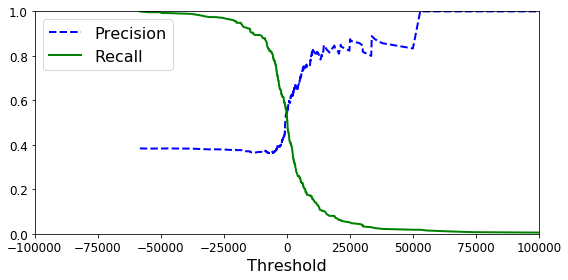

In [250]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-100000, 100000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

Saving figure precision_vs_recall_plot


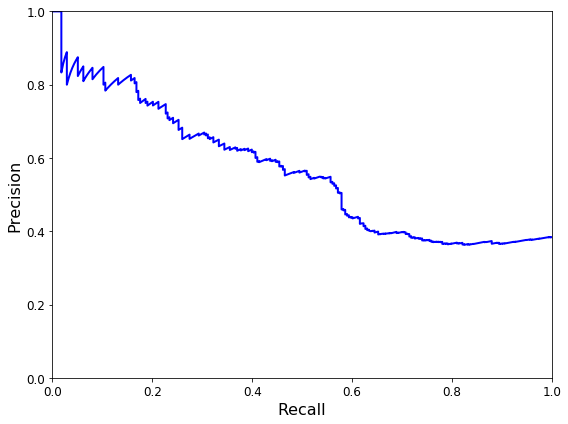

In [251]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

# ROC curves

In [253]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(titanic_train_y, y_scores)

Saving figure roc_curve_plot


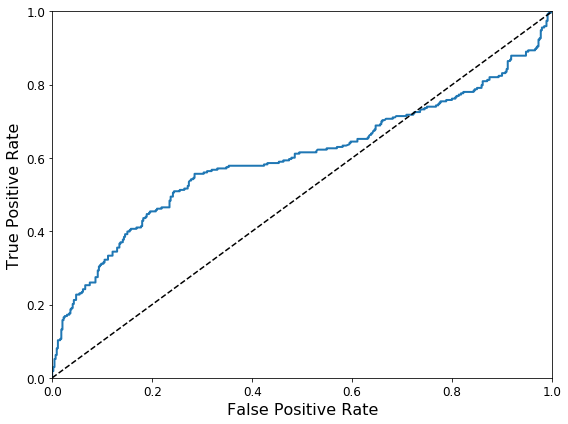

In [254]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

In [255]:
from sklearn.metrics import roc_auc_score

roc_auc_score(titanic_train_y, y_scores)

0.5989344747886889

In [257]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(titanic_train_x, titanic_train_y)
y_probas_forest = cross_val_predict(forest_clf, titanic_train_x, titanic_train_y, cv=3,
                                    method="predict_proba")

In [258]:
cross_val_score(forest_clf, titanic_train_x, titanic_train_y, cv=3, scoring="accuracy")

array([0.78151261, 0.81012658, 0.80168776])

In [260]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(titanic_train_y,y_scores_forest)

Saving figure roc_curve_comparison_plot


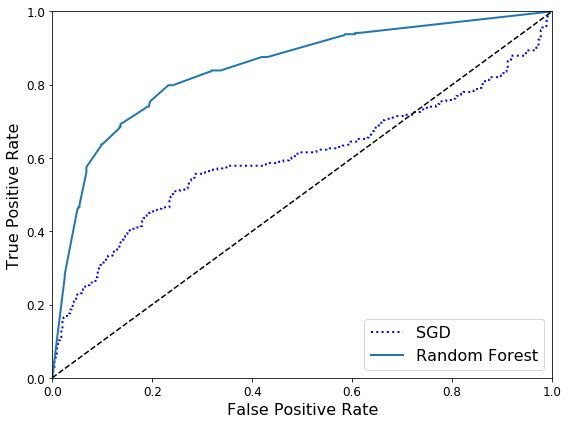

In [262]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [264]:
roc_auc_score(titanic_train_y, y_scores_forest)

0.8441220889968042

In [267]:
y_train_pred_forest = cross_val_predict(forest_clf, titanic_train_x, titanic_train_y, cv=3)
precision_score(titanic_train_y, y_train_pred_forest)

0.7590361445783133

In [268]:
recall_score(titanic_train_y, y_train_pred_forest)

0.6923076923076923